In [36]:
import numpy as np
import pandas as pd
from Square import Square
import os

points_in_square = pd.read_csv("/home/repos/SOMPython/points_to_analize.csv")
points_in_square = points_in_square.values

square = Square(points_in_square, 0, 0)

In [37]:
#square.randomize_points(50)

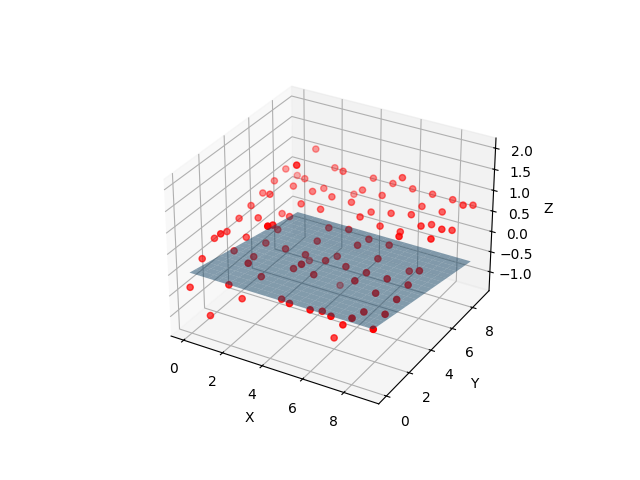

In [63]:
%matplotlib ipympl
import matplotlib.pyplot as plt
normal_x, normal_y, normal_Z = square.svd_method()
# Create grid values
x = np.linspace(min(square.points[:,1]), max(square.points[:,1]),20) #x i y są zamienione miejscami ???
y = np.linspace(min(square.points[:,0]), max(square.points[:,0]),20)
xx, yy = np.meshgrid(x, y)

# Calculate Z values
Z = (-normal_x * xx - normal_y * yy) / normal_Z

# Create the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(square.points[:,0], square.points[:,1], square.points[:,2], c='r', marker='o')  # c - kolor,  marker - kształt punktoru

ax.plot_surface(yy, xx, Z, alpha=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()